# Supervised Learning from basics to 100 km/h

Machine learning (ML) is a subset of artificial intelligence (AI) that involves training algorithms to learn patterns and make predictions or decisions from data. Two main approaches to machine learning are supervised learning and unsupervised learning.

Supervised learning is a type of machine learning that involves training an algorithm on a labeled dataset. In supervised learning, the algorithm is provided with a set of input data and corresponding output data, known as labels, and the goal is to learn a mapping between the inputs and the outputs. The algorithm uses this labeled data to learn the relationship between the input features and the output label, and can then make predictions on new, unseen data. Examples of supervised learning include classification and regression problems.

Unsupervised learning, on the other hand, is a type of machine learning that involves training an algorithm on an unlabeled dataset. In unsupervised learning, the algorithm is not given any specific labels or output information, and its goal is to identify patterns or structure in the input data. This can involve clustering similar data points together, dimensionality reduction, or finding anomalies or outliers in the data. Examples of unsupervised learning include clustering, anomaly detection, and dimensionality reduction.

One key difference between supervised and unsupervised learning is the type of data used for training. Supervised learning requires labeled data, which can be costly and time-consuming to obtain, while unsupervised learning can work with unlabeled data, which is often easier to obtain. Another difference is the output of the algorithm: supervised learning produces a specific output based on the input and label data, while unsupervised learning may identify patterns or structure in the data without any specific output.

In supervised learning, the algorithm is usually trained to minimize the difference between its predictions and the true labels. This requires a clear definition of what is considered correct, as the algorithm's performance is evaluated against the labeled data. In unsupervised learning, the goal is often to find a structure or pattern in the data that is not predefined, and the algorithm's performance is evaluated based on how well it identifies this structure or pattern.

Finally, supervised and unsupervised learning can be combined in some applications, for example, semi-supervised learning, where some labeled data is used to guide the learning process in addition to the unlabeled data, or reinforcement learning, which involves learning from a feedback signal rather than labeled data.

In summary, supervised learning involves training an algorithm on labeled data to learn a mapping between inputs and outputs, while unsupervised learning involves finding patterns or structure in unlabeled data. The choice between supervised and unsupervised learning depends on the nature of the problem and the availability of labeled data.

The most simple supervised regression task we can do is propably linear regression. In python we can either use build in functions:

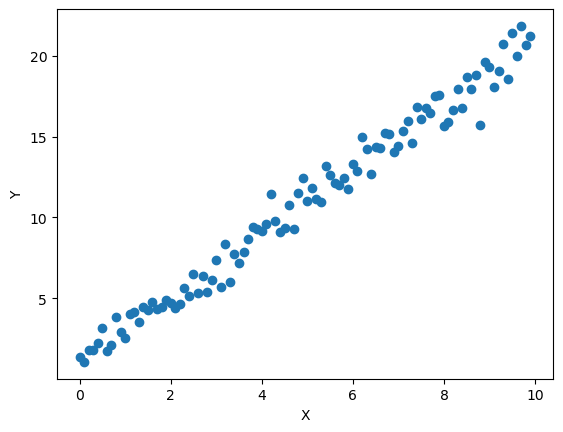

Slope: 1.9888180085583664
Intercept: 1.0952664196876074


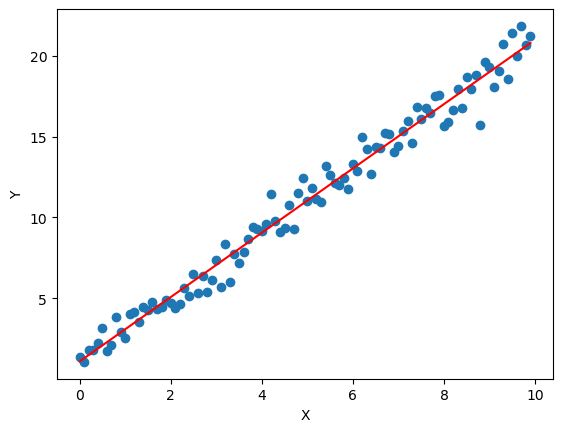

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data for linear regression
x = np.arange(0, 10, 0.1)
y = 2 * x + 1 + np.random.randn(len(x))

# Plot the data to visualize the relationship
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Fit a linear regression model to the data
slope, intercept = np.polyfit(x, y, 1)

# Print the slope and intercept of the regression line
print("Slope:", slope)
print("Intercept:", intercept)

# Plot the regression line on top of the scatter plot
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Or implement linear regression from scratch:

Slope: 1.9539272156051448
Intercept: 1.2267408197665448


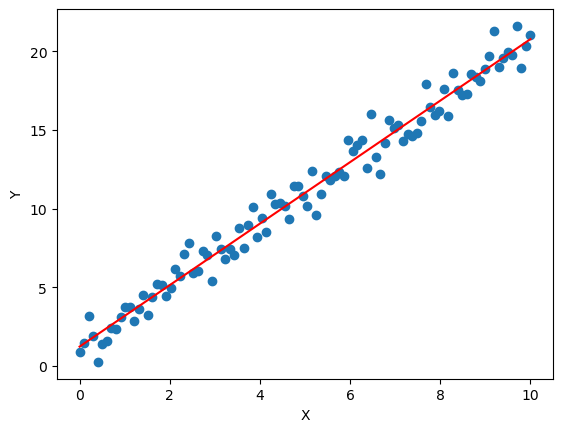

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data for linear regression with noise
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.randn(len(x))

# Calculate the slope and intercept of the regression line
X = np.column_stack((x, np.ones(len(x))))
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
slope, intercept = theta[0], theta[1]

# Print the slope and intercept of the regression line
print("Slope:", slope)
print("Intercept:", intercept)

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Ok next up would be a more complicated example of fitting a polynominal ... there are some shortcuts to do this for lower degree polynominals but above 5 this cannot be solved analytically so screw it here is one using scipy optimize. This is a very powerful function as it can implement gradient descent.

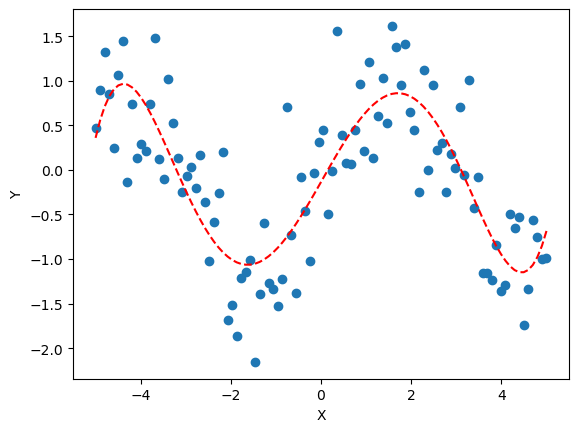

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate some sample data for polynomial regression with noise
x = np.linspace(-5, 5, 100)
y = np.sin(x) + np.random.randn(len(x))*0.5

# Define the degree of the polynomial to fit
degree = 5

# Define the polynomial function to fit
def poly_func(coeffs, x):
    return np.sum([coeffs[i] * x**i for i in range(degree+1)], axis=0)

# Define the loss function to minimize
def loss(coeffs, x, y):
    y_pred = poly_func(coeffs, x)
    return np.mean((y_pred - y)**2)

# Find the optimal coefficients using minimize
initial_guess = np.zeros(degree+1)
res = minimize(loss, initial_guess, args=(x, y))

# Evaluate the polynomial at a range of points
xx = np.linspace(-5, 5, 100)
yy = poly_func(res.x, xx)

# Plot the data and the fitted polynomial
plt.scatter(x, y)
plt.plot(xx, yy,'--', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Ok great this is in 1D but can we do this in 2d?

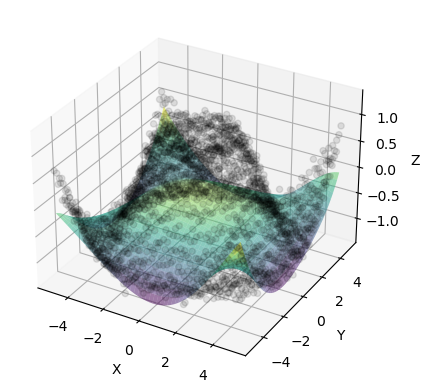

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Generate some sample data for polynomial regression with noise
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) + np.random.randn(X.shape[0], X.shape[1])*0.1

# Define the degree of the polynomial to fit
degree = 5

# Define the polynomial function to fit
def poly_func(coeffs, X, Y):
    p = np.zeros_like(X)
    for i in range(degree+1):
        for j in range(degree+1):
            if i+j <= degree:
                p += coeffs[i*(degree+1)+j] * X**i * Y**j
    return p

# Define the loss function to minimize
def loss(coeffs, X, Y, Z):
    Z_pred = poly_func(coeffs, X, Y)
    return np.mean((Z_pred - Z)**2)

# Find the optimal coefficients using minimize
initial_guess = np.zeros((degree+1)**2)
res = minimize(loss, initial_guess, args=(X, Y, Z), method='Nelder-Mead')

# Evaluate the polynomial on a grid and plot as a surface
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
zz = poly_func(res.x, xx, yy)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.5)
ax.scatter(X, Y, Z, color='black', alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

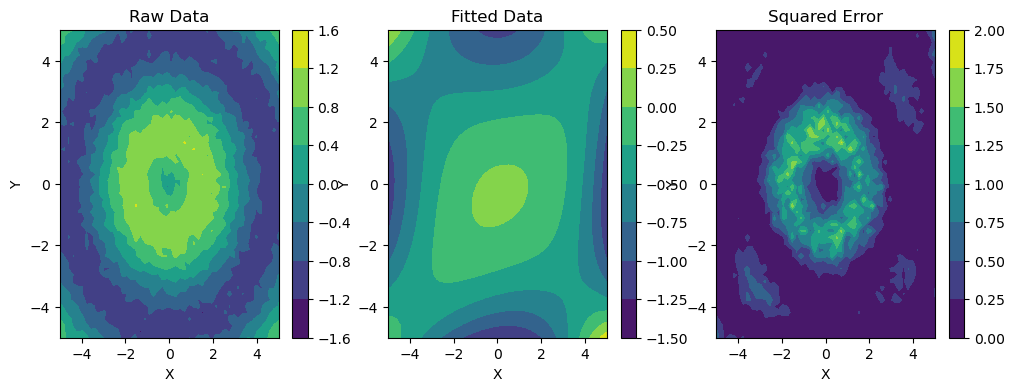

In [14]:

# Plot the raw data, fitted data, and MSE in a three-panel subplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the raw data as a contour plot
c = ax[0].contourf(X, Y, Z, cmap='viridis')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Raw Data')
plt.colorbar(c, ax=ax[0])

# Plot the fitted data as a contour plot
c = ax[1].contourf(xx, yy, zz, cmap='viridis')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Fitted Data')
plt.colorbar(c, ax=ax[1])

# Plot the SE as a contour plot

c = ax[2].contourf(xx, yy, (zz - Z)**2, cmap='viridis')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
ax[2].set_title('Squared Error')
plt.colorbar(c, ax=ax[2])

plt.show()

Ok now we can do fitting in 2D ... let's try it out on our dataset with the melting points!

In [18]:
import os
import pandas as pd
import urllib.request

url = 'https://raw.githubusercontent.com/flawnson/Melting_point_predictor_NN_Regression/master/BradleyMeltingPointDatasetClean.csv'

molecules = pd.read_csv(url,index_col=0,parse_dates=[0])

from rdkit import Chem
from rdkit.Chem import AllChem

# Create a list to hold the fingerprints
fingerprints = []
melting_points = []

# Iterate over the 'smiles' column in the dataframe
for smi,melt in zip(molecules['smiles'],molecules['mpC']):
    try:
        # Convert the SMILES string to a molecule object
        mol = Chem.MolFromSmiles(smi)
        # Generate the fingerprint for the molecule
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=64)
        # Append the fingerprint to the list
        fingerprints.append(fp)
        melting_points.append(melt)
    except:
        pass

[18:58:32] Explicit valence for atom # 20 C, 5, is greater than permitted
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 23
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[18:58:32] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 8 9 10 11 12 13 14
[18:58:32] Can't kekulize mol.  Unkeku

# Dataset spliting

Jeah we have a large dataset but we need to split it into test train and validation.
ChatGPT explains very nicely why:

Splitting a dataset into test, train, and validation subsets is important in machine learning because it allows us to evaluate the performance of our model on data that it hasn't seen during training, and to select the best model for our task.

The train dataset is the subset of the data that we use to train our model. This is the data that we use to fit the parameters of our model to the data, and to adjust our model architecture and hyperparameters to optimize its performance on this data. The goal of training is to create a model that generalizes well to new data.

The test dataset is a subset of the data that is held out from training, and is used to evaluate the performance of the model on new, unseen data. By evaluating our model on a separate test set, we can get an estimate of how well our model will perform on new, real-world data.

The validation dataset is also a subset of the data that is held out from training, but is used for a different purpose than the test set. The validation dataset is used to select the best model among several candidate models. During training, we may experiment with different architectures and hyperparameters for our model, and we may evaluate the performance of each variant on the validation set. We can then select the best model based on its performance on the validation set, and then evaluate its performance on the test set to get an estimate of its performance on new data.

The key difference between the test and validation datasets is the purpose for which they are used. The test dataset is used to evaluate the final model, and should not be used during training for any purpose, including model selection or hyperparameter tuning. On the other hand, the validation dataset is used for model selection and hyperparameter tuning, and should not be used to evaluate the final model performance. By splitting the data into test, train, and validation subsets, we can ensure that we are not overfitting to the training data, and that we are selecting the best model for our task based on its generalization performance.

In [20]:
from sklearn.model_selection import train_test_split
# Assume that 'fingerprints' and 'melting_points' are lists containing the data
# that we want to split into train, test, and validation sets

# Combine the data into a single array
X = np.array(fingerprints)
y = np.array(melting_points)

# Set the random seed for reproducibility
np.random.seed(42)

# Split the data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split the train data into train and validation sets (75:25 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

Remeber that the fingerprint were binary to linear regression will likely work really bad on the fingerprints!

In [24]:
from sklearn.linear_model import LinearRegression

# Reshape y_train to have a 2D shape
y_train = y_train.reshape(-1, 1)

# Create a LinearRegression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)


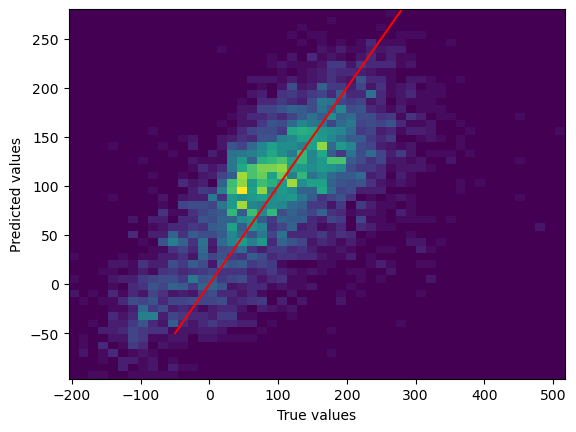

In [30]:
import matplotlib.pyplot as plt

# Plot the predicted vs true values on a scatter plot
plt.hist2d(y_test.flatten(), y_pred.flatten(),50)
plt.plot([-50,300],[-50,300],c='red')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

Let's output some metrics!

ChatGPT explains the r2 score as follows:

The R2 score is a measure of how well a regression model fits the data, and is often used to evaluate the performance of a regression model. It represents the proportion of the variance in the dependent variable (y) that is explained by the independent variable(s) (X) in the model. The R2 score ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

The formula for calculating the R2 score is:

$$R2 = 1 - (SSres / SStot)$$

where SSres is the sum of the squared residuals (the difference between the predicted and true values), and SStot is the total sum of squares (the difference between the true values and the mean of the true values). In other words, the R2 score is the ratio of the explained variance to the total variance of the dependent variable.

Intuitively, the R2 score tells us how much of the variability in the dependent variable can be explained by the independent variable(s) in the model. A score of 1 indicates that the model perfectly fits the data, while a score of 0 indicates that the model does not explain any of the variability in the data.

In the example code above, we use scikit-learn's r2_score function to calculate the R2 score between the true values (y_test) and the predicted values (y_pred). We then print the R2 score using f-strings with three decimal places for readability.

The R-squared (R2) score is a measure of how well a regression model fits the data, and is often used to evaluate the performance of a regression model. The R2 score ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

An R2 score of 1 indicates that the model perfectly fits the data, meaning that all of the variability in the dependent variable (y) is explained by the independent variable(s) (X) in the model. This would be an ideal scenario, but it is rare in practice. In most cases, the R2 score will be less than 1, indicating that the model does not perfectly fit the data.

An R2 score of 0 indicates that the model does not explain any of the variability in the dependent variable. This could happen if the model is a poor fit for the data, or if the dependent variable is completely random and unrelated to the independent variable(s).

In general, the range of R2 scores can be interpreted as follows:

- R2 score of 1: Perfect fit, all of the variability in the dependent variable is explained by the independent variable(s) in the model.
- R2 score between 0.7 and 0.99: Strong fit, the model explains a high proportion of the variability in the dependent variable.
- R2 score between 0.5 and 0.7: Moderate fit, the model explains a moderate proportion of the variability in the dependent variable.
- R2 score between 0 and 0.5: Weak fit, the model explains a low proportion of the variability in the dependent variable.
- R2 score of 0: The model does not explain any of the variability in the dependent variable.

It is important to keep in mind that the interpretation of the R2 score depends on the context and the specific problem being addressed. In some cases, a high R2 score may be desirable, while in other cases a lower R2 score may be acceptable or even preferred. For example, in some cases a model with a lower R2 score may be more interpretable or easier to implement in practice.

In [32]:
from sklearn.metrics import r2_score

# Calculate the R2 score between the true and predicted values
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.3f}')
#aka bad

R2 score: 0.470


Typically this is a results of confusing out model with lots of sparse data so we can instead use the PCA of the fingerprints ...
this is done in the code below:

In [33]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Perform PCA on the fingerprints data
n_components = 10  # number of PCA components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Split the PCA data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# Create a LinearRegression model and fit it to the training data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate the R2 score between the true and predicted values
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.3f}')


R2 score: 0.398


ok this still sucks ... what about featurization in general? chatGPT explains this as:

Featurization is the process of transforming raw data into a format that is suitable for use as input to a machine learning model. In the context of molecular machine learning, featurization typically involves converting molecular structures or descriptors (such as fingerprints or descriptors) into a set of numerical features that can be used as input to a model.

One of the benefits of featurization is that it can help to address issues with the data, such as sparsity or high dimensionality. For example, in the case of binary fingerprints like Morgan fingerprints, which are often used to represent molecular structures, the data can be very high-dimensional and sparse. Featurization can be used to reduce the dimensionality of the data, by selecting a smaller set of informative features that capture the most relevant information about the molecules. This can help to improve the performance of the model, and also reduce the computational complexity of the analysis.

In addition to reducing dimensionality, featurization can also help to address other issues with the data, such as missing values or noisy data. For example, some featurization methods can be used to impute missing values or smooth out noisy data, which can improve the accuracy and robustness of the model.

# other regressors

An AIs favourite list:

- Linear Regression: Linear regression is a simple and widely-used algorithm for regression tasks. It models the relationship between a dependent variable and one or more independent variables using a linear function.

- Ridge Regression: Ridge regression is a variant of linear regression that adds a regularization term to the loss function, which helps to prevent overfitting by penalizing large weights.

- Lasso Regression: Lasso regression is another variant of linear regression that adds a different type of regularization term to the loss function, which encourages sparse feature selection by setting some of the weights to zero.

- Elastic Net Regression: Elastic net regression is a combination of ridge regression and lasso regression that balances the strengths of both regularization methods to achieve better performance.

- Polynomial Regression: Polynomial regression is a type of regression that models the relationship between the dependent variable and the independent variables as a polynomial function of the input features.

- Decision Tree Regression: Decision tree regression is a type of regression that models the relationship between the dependent variable and the independent variables using a decision tree, which recursively partitions the feature space into smaller regions.

- Random Forest Regression: Random forest regression is an ensemble method that combines multiple decision tree models to achieve better performance and reduce overfitting.

- Support Vector Regression: Support vector regression is a type of regression that models the relationship between the dependent variable and the independent variables using support vector machines, which aim to find the hyperplane that maximizes the margin between the training data points and the predicted values.

- Neural Network Regression: Neural network regression is a type of regression that models the relationship between the dependent variable and the independent variables using a neural network, which consists of multiple layers of interconnected nodes that can learn complex and nonlinear relationships between the input and output variables.

We can try ridge regression and see if that works better?

In [35]:
from sklearn.linear_model import Ridge

# Split the data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Ridge regression model and fit it to the training data
alpha = 1.0  # regularization strength
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R2 score between the true and predicted values
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.3f}')


R2 score: 0.478


Ok so obviously we have a pretty hard problem at hand so et's try something else like random forest regressors. 
Best explained here: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a random forest model and fit it to the training data
n_trees = 100  # number of trees in the forest
max_depth = 30  # maximum depth of each tree
m_try = 'sqrt'  # number of features to consider at each split ('sqrt' for random selection)
model = RandomForestRegressor(n_estimators=n_trees, max_depth=max_depth, max_features=m_try)
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R2 score between the true and predicted values
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.3f}')


R2 score: 0.762


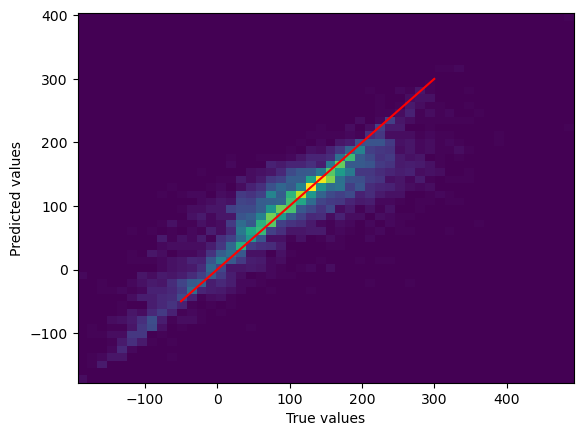

In [39]:
import matplotlib.pyplot as plt

# Plot the predicted vs true values on a scatter plot
plt.hist2d(y_test.flatten(), y_pred.flatten(),50)
plt.plot([-50,300],[-50,300],c='red')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

# Can we predict optical absorption from composition?

Let's load our dataset again!

In [40]:
import os
import urllib.request

url = 'https://data.caltech.edu/records/ksy2t-w6215/files/synthesis_imaging_spectroscopy_metal_oxides.h5'
filename = 'synthesis_imaging_spectroscopy_metal_oxides.h5'

# Check if the file already exists in the current directory
if not os.path.exists(filename):
    # If the file does not exist, download it
    print('Downloading file...')
    urllib.request.urlretrieve(url, filename)
    print('Download complete.')
else:
    print('File already exists in current directory.')

File already exists in current directory.


In [44]:
import h5py
materials_icp = h5py.File(filename, 'r')
# Get the spectrum for the randomly-selected index
spectrum_data = materials_icp['spectra'].__array__()
# Get the atomic fraction data and keys from the materials_icp dictionary
atfrac = materials_icp['atfrac'].__array__().T
atfrac_keys = materials_icp['atfrac_keys'][:]

In [53]:
from tqdm import tqdm
X_temp = atfrac
y = spectrum_data[:,110] #we take the aborption at a point

#It is better to featurize the compositional data
# Generate 42 random embeddings with dimension 64
#That way we have like a random feature vector for any element ...
element_embeddings = np.random.rand(64, 42)

def calculate_average_embedding(embeddings, feature_vector):
    # Calculate the dot product between the embeddings and the feature vector
    dot_products = np.dot(embeddings, feature_vector)
    
    # Calculate the weighted average of the embeddings
    if not np.sum(dot_products)==0:
        weights = dot_products / np.sum(dot_products)
    else:
        weights = dot_products*0
    average_embedding = np.dot(weights, embeddings)
    return average_embedding

X_emb = np.array([calculate_average_embedding(element_embeddings, vec) for vec in tqdm(X_temp)])


100%|██████████| 180902/180902 [00:01<00:00, 92030.87it/s]


In [54]:
X_emb.shape

(180902, 42)

Nice ... so can we have a random forest trained on this?

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_emb, y, test_size=0.2)

# Create a random forest model and fit it to the training data
n_trees = 100  # number of trees in the forest
max_depth = 30  # maximum depth of each tree
m_try = 'sqrt'  # number of features to consider at each split ('sqrt' for random selection)
model = RandomForestRegressor(n_estimators=n_trees, max_depth=max_depth, max_features=m_try)
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R2 score between the true and predicted values
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.3f}')


R2 score: 0.659


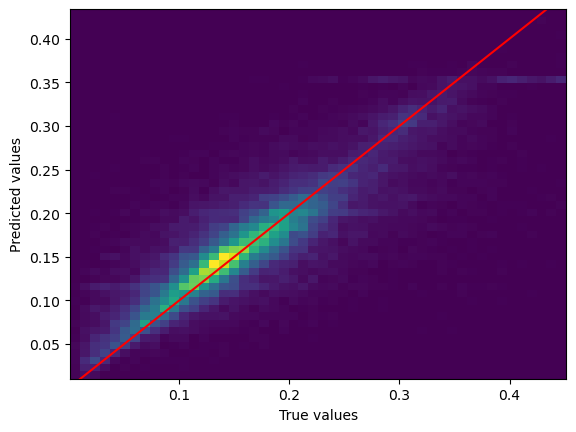

In [56]:
import matplotlib.pyplot as plt

# Plot the predicted vs true values on a scatter plot
plt.hist2d(y_test.flatten(), y_pred.flatten(),50)
plt.plot([-50,300],[-50,300],c='red')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

not too bad but also not too great. Have found the holy grail of predicting optical absorption from only compositions???
No ... we need to do more rigorous testing. I explain it in this article https://www.sciencedirect.com/science/article/abs/pii/S2589597422001265

The gist of it is we should use sorted splitting...

In [57]:
import numpy as np

# Calculate the upper and lower 10% percentiles of y
lower_percentile = np.percentile(y, 10)
upper_percentile = np.percentile(y, 90)

# Get the indices of y that fall within the lower and upper percentiles
lower_indices = np.where(y <= lower_percentile)[0]
upper_indices = np.where(y >= upper_percentile)[0]

# Combine the lower and upper indices into a single set of indices for the training set
train_indices = np.concatenate((lower_indices, upper_indices))

# Get the remaining indices for the test set
test_indices = np.setdiff1d(np.arange(len(y)), train_indices)


In [58]:
X_train = X_emb[train_indices]
y_train = y[train_indices]
X_test = X_emb[test_indices]
y_test = y[test_indices]

Now let's do this again:

In [59]:
# Create a random forest model and fit it to the training data
n_trees = 100  # number of trees in the forest
max_depth = 30  # maximum depth of each tree
m_try = 'sqrt'  # number of features to consider at each split ('sqrt' for random selection)
model = RandomForestRegressor(n_estimators=n_trees, max_depth=max_depth, max_features=m_try)
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R2 score between the true and predicted values
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.3f}')

R2 score: -2.729


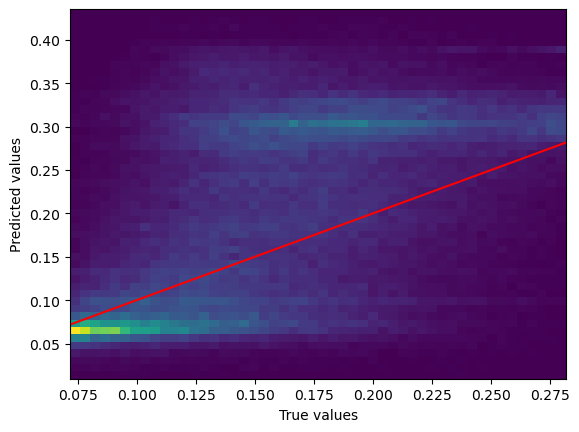

In [60]:
# Plot the predicted vs true values on a scatter plot
# this is phenominally bad!

plt.hist2d(y_test.flatten(), y_pred.flatten(),50)
plt.plot([-50,300],[-50,300],c='red')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

# Solving realistic problems

Let's see if we can do active learning using catalyst data. This involes uncertianty quantification  ...
Predicting data from a machine learning model is one thing but asking the model also how uncertian it is is next level!

Here is how we can do it on the catalyst data:


In [100]:
import os
import urllib.request
import pickle

# Check if the file has already been downloaded
if not os.path.isfile('tri_data_share.pck'):
    # If the file hasn't been downloaded, download it
    url = 'https://github.com/SantoshSuram-TRI/ACE-I/raw/master/tri_data_share.pck'
    urllib.request.urlretrieve(url, 'tri_data_share.pck')

# Load the data from the downloaded file into a variable called 'materials_OER'
with open('tri_data_share.pck', 'rb') as f:
    materials_OER = pickle.load(f)

y = materials_OER['3496']['fom']# figure of merit
X = materials_OER['3496']['comp']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a random forest model with 100 trees
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor()

R2 score: 0.795


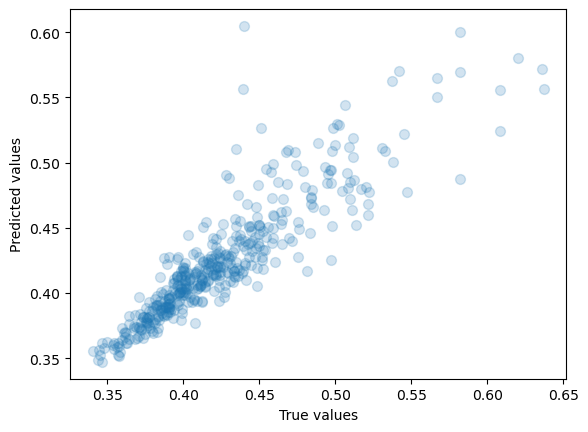

In [72]:

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R2 score between the true and predicted values
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.3f}')

# Plot the predicted vs true values on a scatter plot

plt.scatter(y_test.flatten(), y_pred.flatten(),50,alpha=0.2)

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

Ok and now we take all the predictions from the individual trees int oconsideration to achieve an uncertianty

In [82]:

def predict_with_uncertainty(X, model, n_estimators=100):
    # Make n_samples predictions for the input data point
    predictions = []
    for i in range(n_estimators):
        # Use a bootstrapped sample of the training data to construct each tree in the forest
        tree = model.estimators_[i].tree_
        # Make a prediction for the input data point using the current tree
        prediction = tree.predict(X.reshape(1, -1).astype(np.float32))
        predictions.append(prediction[0])

    # Calculate the mean and standard deviation of the predictions
    mean_prediction = np.mean(predictions)
    stddev_prediction = np.std(predictions)

    return mean_prediction, stddev_prediction


In [83]:
predictions, uncertianties = [],[]
for X_ in X_test:
    p,u = predict_with_uncertainty(X_, model, n_estimators=n_trees)
    predictions.append(p)
    uncertianties.append(u)

Text(0, 0.5, 'Uncertianty')

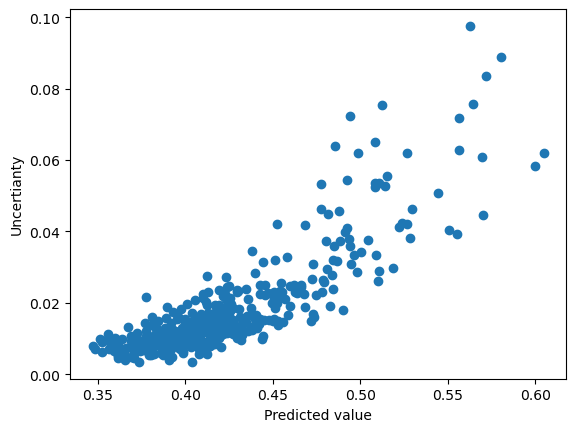

In [87]:
#interesting to see that the uncertianty gets higher with the predicted values

plt.scatter(predictions,uncertianties)
plt.xlabel('Predicted value')
plt.ylabel('Uncertianty')

Ok so far we used large datasets to train machine learning models ... how about using less data? Yes, machine learning with as few datapoints as possibile. This is done through active learning and is explaine dby chatGPT:

Active learning is a machine learning technique that aims to minimize the number of labeled examples required to train an accurate model. The basic idea is to iteratively select the most informative examples from an unlabeled dataset, and then request labels for those examples from an oracle (such as a human expert or a lab experiment), with the goal of improving the accuracy of the model with each iteration.

The key to active learning is the selection of the most informative examples to label. There are several common strategies for doing this, including uncertainty sampling, query-by-committee, and density-weighted sampling.

In uncertainty sampling, the model is trained on the labeled examples and then used to make predictions for the unlabeled examples. The examples for which the model is most uncertain (i.e., for which the predicted class probabilities are closest to 0.5) are then selected for labeling. The intuition behind this approach is that the examples for which the model is most uncertain are also the examples that are most likely to improve the model's accuracy if they are labeled correctly.

In query-by-committee, multiple models are trained on different subsets of the labeled data, and the disagreement between the models is used as a measure of uncertainty. The examples for which the models disagree the most are then selected for labeling. The intuition behind this approach is that the examples for which the models disagree the most are also the examples that are most likely to be on the decision boundary between classes.

In density-weighted sampling, the examples are weighted by their density in the feature space, with the goal of selecting examples that are far away from the labeled examples. The intuition behind this approach is that the examples that are far away from the labeled examples are also the examples that are most likely to provide new information to the model.

The goal of active learning is to achieve a high accuracy with as few labeled examples as possible. By carefully selecting the most informative examples for labeling, active learning can often achieve better accuracy with fewer labeled examples than traditional supervised learning methods. This can be especially useful in applications where labeling examples is expensive or time-consuming, such as in scientific experiments or medical diagnoses.

Let's give this a try ...

In [139]:

#first we generate train and test lists
train_list = [i for i in np.random.choice([i for i in range(len(y))],2)]
test_list = [i for i in range(len(y)) if not i in train_list]
mse_scores = [1]
#we let this run for 50 steps because we need to re-train every time!!
n_runs = 30
penalty = 0
for n in tqdm(range(n_runs)):
    model = RandomForestRegressor(n_estimators=100,random_state=1337)
    model.fit(X[train_list,:], y[train_list])
    #predict all uncertianties
    predictions, uncertianties = [],[]
    for X_ in X[test_list]:
        p,u = predict_with_uncertainty(X_, model, n_estimators=n_trees)
        predictions.append(p)
        uncertianties.append(u)
    mse_scores.append(np.mean(predictions- y[test_list])**2)
    #select the sample with the highest uncertianty
    ix = np.argmax(uncertianties)
    train_list.append(test_list.pop(ix))
    #this is not entirely correct because we should actually compare this agains a static set but you get the idea ...
    if mse_scores[-1]>mse_scores[-2]:
        penalty += 1
    else:
        penalty = 0
    if penalty>3:
        break


 17%|█▋        | 5/30 [00:04<00:24,  1.01it/s]


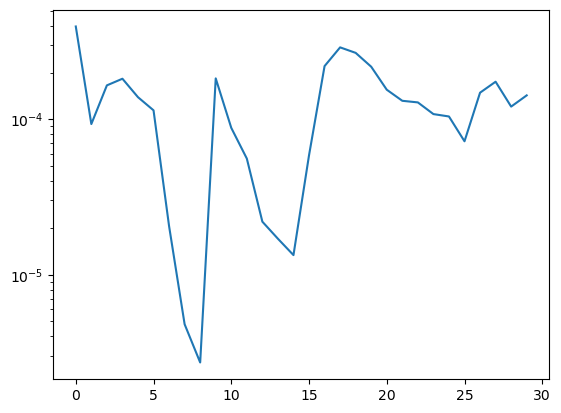

In [124]:
plt.semilogy(mse_scores)

In [137]:
err = []
for i in tqdm(range(100)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98)

    # Create a random forest model with 100 trees
    model = RandomForestRegressor(n_estimators=100)

    # Fit the model to the training data
    model.fit(X_train, y_train)
    # Use the model to make predictions on the test set
    y_pred = model.predict(X_test)

    err.append(np.mean(y_pred- y_test)**2)

100%|██████████| 100/100 [00:06<00:00, 14.49it/s]


3.433010699867232e-05


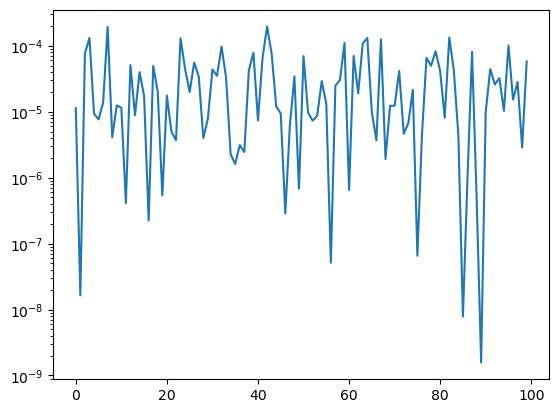

In [138]:
plt.semilogy(err)
print(np.mean(err))

In [141]:
#first we generate train and test lists
train_list = [i for i in np.random.choice([i for i in range(len(y))],2)]
test_list = [i for i in range(len(y)) if not i in train_list]
min_mses = []
for j in range(100):
    mse_scores = [1]
    #we let this run for 50 steps because we need to re-train every time!!
    n_runs = 30
    penalty = 0
    for n in tqdm(range(n_runs)):
        model = RandomForestRegressor(n_estimators=100,random_state=1337)
        model.fit(X[train_list,:], y[train_list])
        #predict all uncertianties
        predictions, uncertianties = [],[]
        for X_ in X[test_list]:
            p,u = predict_with_uncertainty(X_, model, n_estimators=n_trees)
            predictions.append(p)
            uncertianties.append(u)
        mse_scores.append(np.mean(predictions- y[test_list])**2)
        #select the sample with the highest uncertianty
        ix = np.argmax(uncertianties)
        train_list.append(test_list.pop(ix))
        #this is not entirely correct because we should actually compare this agains a static set but you get the idea ...
        if mse_scores[-1]>mse_scores[-2]:
            penalty += 1
        else:
            penalty = 0
        if penalty>3:
            break
    min_mses.append(min(mse_scores))

 83%|████████▎ | 25/30 [00:06<00:01,  3.97it/s]c:\Users\helge\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\helge\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 83%|████████▎ | 25/30 [00:06<00:01,  3.79it/s]


ValueError: attempt to get argmax of an empty sequence

5.2877311942130196e-05


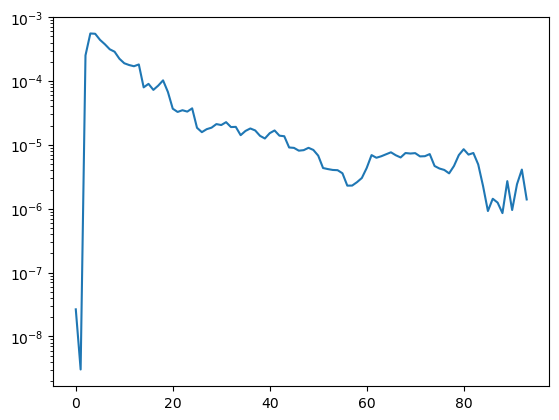

In [145]:
plt.semilogy(min_mses)
print(np.mean(min_mses))